**This model aims to diagnose Banana Leaf Diseases using Convolutional Neural Network. It classifies the Banana leaf diseases using Deep Learning. The dataset contains images of 3 prominent banana leaf spot diseases: (a) Cordana  (b) Pestalotiopsis and (c)  Sigatoka. It also contains images of healthy leaves. The set contains 400 images for each class, totalling 1600 images.**

In [3]:
#Importing Necessary Libraries
import PIL
from PIL import Image

In [4]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [5]:
import os
import os.path

In [6]:
import cv2

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
dataset_dir = "banana"

In [13]:
import pathlib

In [14]:
dataset_dir = pathlib.Path(dataset_dir) #loading dataset

In [15]:
dataset_dir

WindowsPath('banana')

In [16]:
image_count =len(list(dataset_dir.glob("*/*.jpeg")))

In [17]:
image_count

1600

In [18]:
healthy = list(dataset_dir.glob("healthy/*"))#loading data from subdirectories

In [19]:
healthy[:5]

[WindowsPath('banana/healthy/0_aug.jpeg'),
 WindowsPath('banana/healthy/100_aug.jpeg'),
 WindowsPath('banana/healthy/101_aug.jpeg'),
 WindowsPath('banana/healthy/102_aug.jpeg'),
 WindowsPath('banana/healthy/103_aug.jpeg')]

In [20]:
cordana = list(dataset_dir.glob("cordana/*"))

In [21]:
cordana[:2]

[WindowsPath('banana/cordana/0_aug.jpeg'),
 WindowsPath('banana/cordana/100_aug.jpeg')]

In [22]:
pestalotiopsis = list(dataset_dir.glob("pestalotiopsis/*"))

In [23]:
sigatoka =list(dataset_dir.glob("sigatoka/*")) 

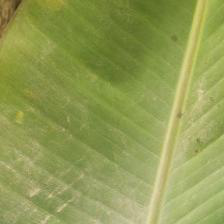

In [24]:
PIL.Image.open(str(healthy[1])) #displaying each classes

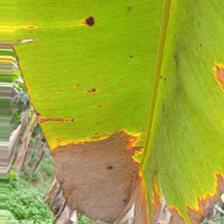

In [25]:
PIL.Image.open(str(cordana[1]))

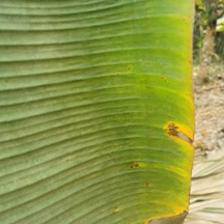

In [26]:
PIL.Image.open(str(pestalotiopsis[1]))

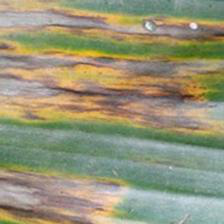

In [27]:
PIL.Image.open(str(sigatoka[1]))

In [28]:

banana_image_dict ={"healthy":list(dataset_dir.glob("healthy/*")),
                    "cordana":list(dataset_dir.glob("cordana/*")),
                    "pestalotiopsis":list(dataset_dir.glob("pestalotiopsis/*")),
                    "sigatoka":list(dataset_dir.glob("sigatoka/*"))}

In [29]:
banana_label_dict = {"healthy":0, "cordana":1, "pestalotiopsis":2,"sigatoka":3} 

In [30]:
str(banana_image_dict["healthy"][0])

'banana\\healthy\\0_aug.jpeg'

In [31]:
img = cv2.imread(str(banana_image_dict["healthy"][0]))
img

array([[[ 17, 141, 119],
        [  7, 131, 109],
        [  2, 120, 101],
        ...,
        [143, 188, 145],
        [143, 186, 143],
        [142, 185, 142]],

       [[ 23, 147, 125],
        [ 14, 135, 114],
        [  4, 122, 103],
        ...,
        [141, 186, 143],
        [142, 185, 142],
        [141, 184, 141]],

       [[ 34, 156, 132],
        [ 22, 143, 122],
        [  9, 127, 108],
        ...,
        [138, 183, 140],
        [138, 183, 140],
        [138, 183, 140]],

       ...,

       [[ 26, 175, 135],
        [ 21, 172, 132],
        [ 19, 169, 126],
        ...,
        [  5, 166, 118],
        [  6, 167, 119],
        [  7, 168, 120]],

       [[ 27, 178, 138],
        [ 22, 176, 135],
        [ 18, 169, 129],
        ...,
        [  8, 169, 121],
        [ 10, 171, 123],
        [ 10, 172, 124]],

       [[ 28, 182, 141],
        [ 24, 178, 137],
        [ 19, 173, 132],
        ...,
        [  8, 169, 121],
        [  8, 170, 122],
        [  9, 171, 123]]

In [32]:
img.shape

(224, 224, 3)

In [33]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [34]:
X,y = [], []
for banana_leaf_disease , images in banana_image_dict.items():
    print(banana_leaf_disease)
    print(len(images))
    


healthy
400
cordana
400
pestalotiopsis
400
sigatoka
400


In [35]:
X,y = [], []
for banana_leaf_disease , images in banana_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(banana_label_dict[banana_leaf_disease])
    

In [43]:
y[:4]

array([0, 0, 0, 0])

In [44]:
X[:4]

array([[[[ 16, 140, 118],
         [  6, 127, 106],
         [  3, 120, 101],
         ...,
         [143, 188, 145],
         [143, 186, 143],
         [142, 185, 142]],

        [[ 26, 149, 126],
         [ 13, 133, 112],
         [  4, 121, 102],
         ...,
         [140, 185, 142],
         [140, 184, 141],
         [140, 184, 141]],

        [[ 37, 159, 135],
         [ 23, 142, 120],
         [  9, 125, 106],
         ...,
         [137, 182, 139],
         [137, 182, 139],
         [138, 183, 140]],

        ...,

        [[ 24, 173, 133],
         [ 21, 170, 129],
         [ 17, 166, 124],
         ...,
         [  2, 160, 113],
         [  2, 162, 114],
         [  3, 163, 116]],

        [[ 26, 177, 136],
         [ 20, 172, 132],
         [ 15, 166, 125],
         ...,
         [  6, 166, 119],
         [  8, 169, 121],
         [  9, 170, 122]],

        [[ 27, 181, 140],
         [ 22, 176, 135],
         [ 15, 169, 128],
         ...,
         [  7, 168, 120],
        

In [45]:
X = np.array(X)

In [46]:
y= np.array(y)

In [47]:
from sklearn.model_selection import train_test_split #splitting data for training and testing

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X,y,random_state =0)

In [49]:
len(X_train)

1200

In [50]:
len(y_test)

400

In [51]:
X_train_scaled = X_train/255

In [52]:
X_test_scaled = X_test /255

In [53]:
X_train_scaled[0]

array([[[0.44705882, 0.63529412, 0.65098039],
        [0.4627451 , 0.65098039, 0.66666667],
        [0.47843137, 0.66666667, 0.68235294],
        ...,
        [0.48235294, 0.65098039, 0.67843137],
        [0.51764706, 0.6745098 , 0.70980392],
        [0.56470588, 0.71764706, 0.75294118]],

       [[0.42745098, 0.61568627, 0.63137255],
        [0.44705882, 0.63529412, 0.65098039],
        [0.46666667, 0.65490196, 0.67058824],
        ...,
        [0.47058824, 0.63921569, 0.67058824],
        [0.50980392, 0.66666667, 0.70196078],
        [0.56078431, 0.71372549, 0.75294118]],

       [[0.43921569, 0.62745098, 0.64313725],
        [0.44705882, 0.63921569, 0.65490196],
        [0.4627451 , 0.65098039, 0.66666667],
        ...,
        [0.45098039, 0.61960784, 0.64705882],
        [0.48235294, 0.63921569, 0.6745098 ],
        [0.5372549 , 0.69019608, 0.7254902 ]],

       ...,

       [[0.36078431, 0.55294118, 0.56078431],
        [0.36862745, 0.56078431, 0.56862745],
        [0.37254902, 0

In [54]:
classes= ["healthy","cordana","pestalotiopsis","sigatoka"]

In [55]:
#appling CNN and buidling the model
num_classes =4
model = Sequential([
    layers.Conv2D(16,3, padding ="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding ="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding ="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(num_classes)
])
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
              metrics =["accuracy"])
model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.2847 - loss: 1.6007
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.6282 - loss: 0.9510
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.7133 - loss: 0.7288
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.8166 - loss: 0.4890
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.8661 - loss: 0.3705
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.8890 - loss: 0.3078
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.8957 - loss: 0.2731
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - accuracy: 0.9215 - loss: 0.2201
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.9344 - loss: 0.2057
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 278ms/step - accuracy: 0.9567 - loss: 0.1400


In [56]:
model.evaluate(X_test_scaled,y_test) # has an accuracy of 0.88

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8777 - loss: 0.3719


[0.38850557804107666, 0.8725000023841858]

In [57]:
y_pred_cnn = model.predict(X_test) #predictions

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [58]:
y_pred_cnn[:4]

array([[-1702.3885 ,   273.7792 ,   945.7395 ,   777.72656],
       [ 1182.5382 ,  -310.38977,   700.0998 ,   -48.14157],
       [-5958.036  ,  3055.0156 ,  1071.5168 ,  5457.3447 ],
       [-1759.8295 ,   282.6711 ,  2401.8716 ,  1313.5796 ]],
      dtype=float32)

In [59]:
y_test = y_test.reshape(-1)

In [60]:
y_test[:4]

array([2, 0, 3, 2])

In [61]:
y_classes = [np.argmax(element) for element in y_pred_cnn]

In [62]:
y_classes[:4]

[2, 0, 3, 2]

In [75]:
#Plotting & predicting classes

In [63]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [64]:
y_test[:26]

array([2, 0, 3, 2, 2, 1, 2, 1, 3, 0, 1, 1, 3, 0, 0, 0, 2, 0, 3, 0, 2, 0,
       0, 2, 2, 1])

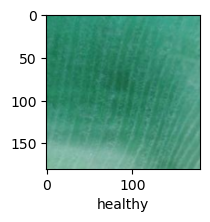

In [65]:
plot_sample(X_test,y_test,1)

In [66]:
classes[y_classes[1]]

'healthy'

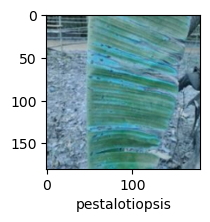

In [67]:
plot_sample(X_test,y_test,3) 

In [68]:
classes[y_classes[3]] #y predicted

'pestalotiopsis'

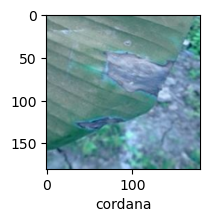

In [69]:
plot_sample(X_test,y_test,25)

In [70]:
classes[y_classes[25]]

'cordana'

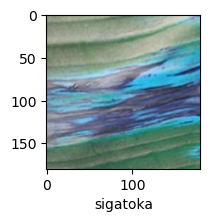

In [73]:
plot_sample(X_test,y_test,2)

In [74]:
classes[y_classes[2]]

'sigatoka'

**Above produced a model that classifies Banana Leaf Diseases using CNN.**